In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('winequality_red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
x = df.drop(columns=['quality'])

In [5]:
y = df.quality

In [6]:
from sklearn.ensemble import BaggingClassifier

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

In [9]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)

In [10]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [11]:
bag_dt.predict(x_test)

array([6, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 4, 6, 7, 7, 5, 5, 6, 6, 5,
       6, 5, 5, 5, 5, 7, 5, 6, 6, 5, 6, 5, 7, 7, 5, 6, 6, 5, 5, 7, 6, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 6, 5, 5, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 7, 6, 6, 5, 6, 5,
       7, 5, 5, 6, 7, 5, 7, 6, 7, 5, 5, 5, 7, 7, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 5, 7, 5, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 8, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 6, 5, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 7, 5, 6,
       6, 7, 7, 5, 5, 7, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5, 6, 5, 7, 6, 5,
       5, 6, 6, 5, 6, 6, 6, 7, 6, 5, 5, 6, 5, 6, 7, 6, 6, 7, 7, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 5, 7, 5, 6, 5, 5, 5, 6, 5, 5, 5, 7, 6, 6, 5, 6,
       5, 6, 5, 5, 5, 7, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6,

In [12]:
bag_dt.base_estimator_

DecisionTreeClassifier()

In [13]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [14]:
bag_dt.estimator_params

()

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
bag_knn = BaggingClassifier(KNeighborsClassifier(6), n_estimators=10)

In [17]:
bag_knn.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [18]:
bag_knn.predict(x_test)

array([5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 5, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 7, 5, 6, 6, 6, 6, 7, 6, 5,
       6, 5, 5, 6, 5, 5, 6, 5, 6, 7, 5, 5, 5, 5, 7, 5, 5, 6, 6, 5, 5, 5,
       5, 7, 7, 7, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 6, 6, 5, 7, 5, 7, 7, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 7, 6, 7, 7, 6,
       7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 7, 6, 5, 7, 6, 5,
       6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 7, 6, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 7,

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier(n_estimators=5)

In [31]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5)

In [32]:
rf.score(x_test,y_test)

0.6275

In [28]:
bag_dt.score(x_test,y_test)

0.6625

In [29]:
bag_knn.score(x_test,y_test)

0.505

In [33]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=35695877),
 DecisionTreeClassifier(max_features='auto', random_state=612158260),
 DecisionTreeClassifier(max_features='auto', random_state=589703286),
 DecisionTreeClassifier(max_features='auto', random_state=826284798),
 DecisionTreeClassifier(max_features='auto', random_state=92829972)]

In [34]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=35695877)

In [36]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

[Text(544.664499470339, 1063.5652173913045, 'X[10] <= 10.35\ngini = 0.642\nsamples = 747\nvalue = [6, 31, 511, 472, 171, 8]'),
 Text(276.42624470338984, 1016.2956521739131, 'X[5] <= 20.5\ngini = 0.498\nsamples = 403\nvalue = [2, 13, 400, 205, 15, 0]'),
 Text(91.32028601694915, 969.0260869565218, 'X[1] <= 0.365\ngini = 0.531\nsamples = 285\nvalue = [2, 10, 253, 168, 11, 0]'),
 Text(35.30847457627119, 921.7565217391304, 'X[6] <= 70.0\ngini = 0.483\nsamples = 34\nvalue = [0, 1, 14, 42, 5, 0]'),
 Text(30.26440677966102, 874.4869565217392, 'X[10] <= 9.75\ngini = 0.409\nsamples = 31\nvalue = [0, 1, 8, 42, 5, 0]'),
 Text(20.17627118644068, 827.2173913043479, 'X[0] <= 10.45\ngini = 0.447\nsamples = 17\nvalue = [0, 1, 8, 20, 0, 0]'),
 Text(15.13220338983051, 779.9478260869566, 'X[7] <= 0.998\ngini = 0.555\nsamples = 9\nvalue = [0, 1, 8, 7, 0, 0]'),
 Text(10.08813559322034, 732.6782608695653, 'X[5] <= 12.5\ngini = 0.219\nsamples = 5\nvalue = [0, 1, 0, 7, 0, 0]'),
 Text(5.04406779661017, 685.4086

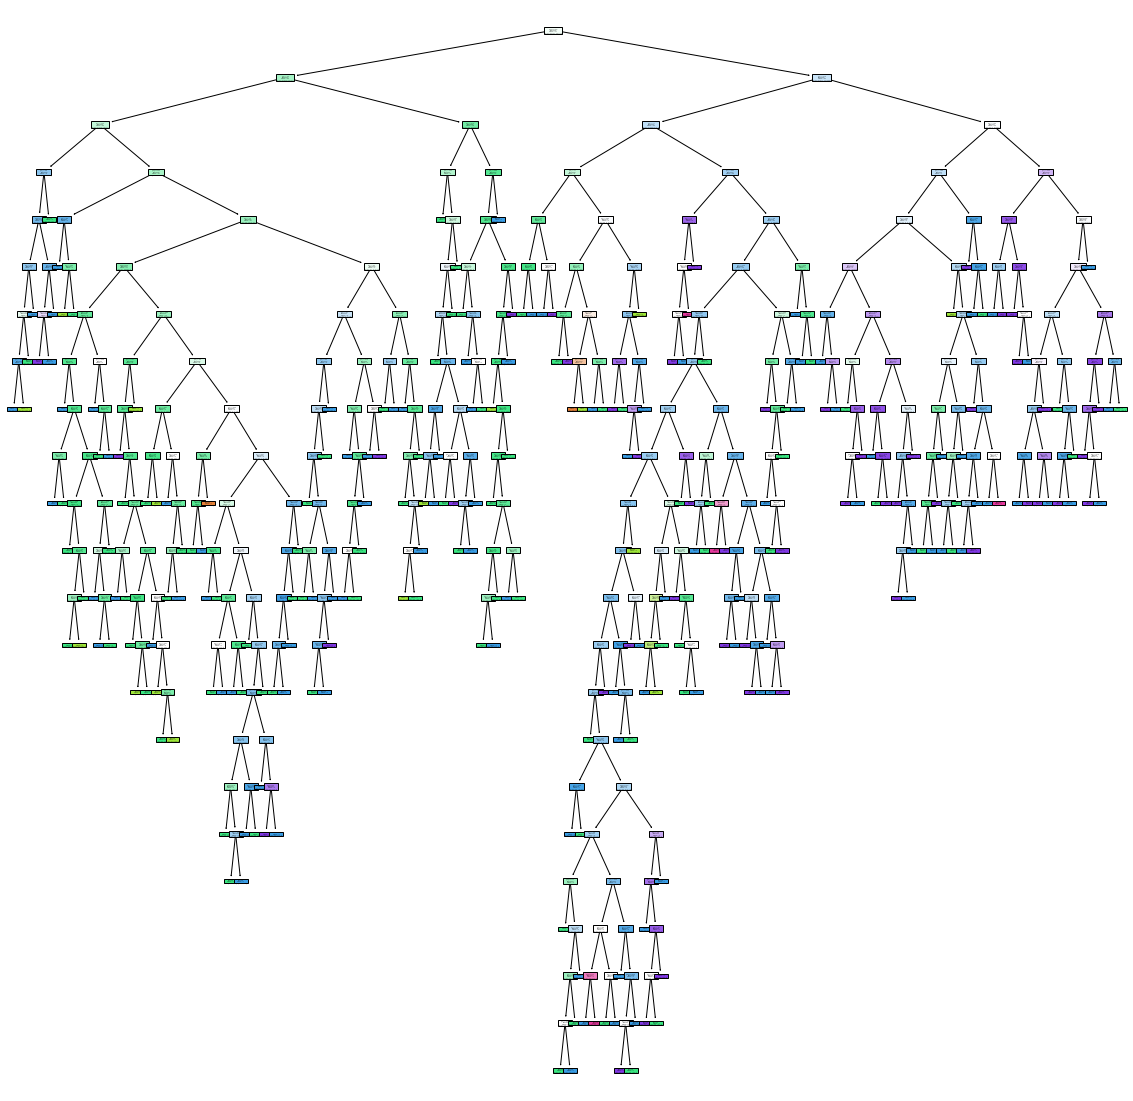

In [38]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0], filled=True)

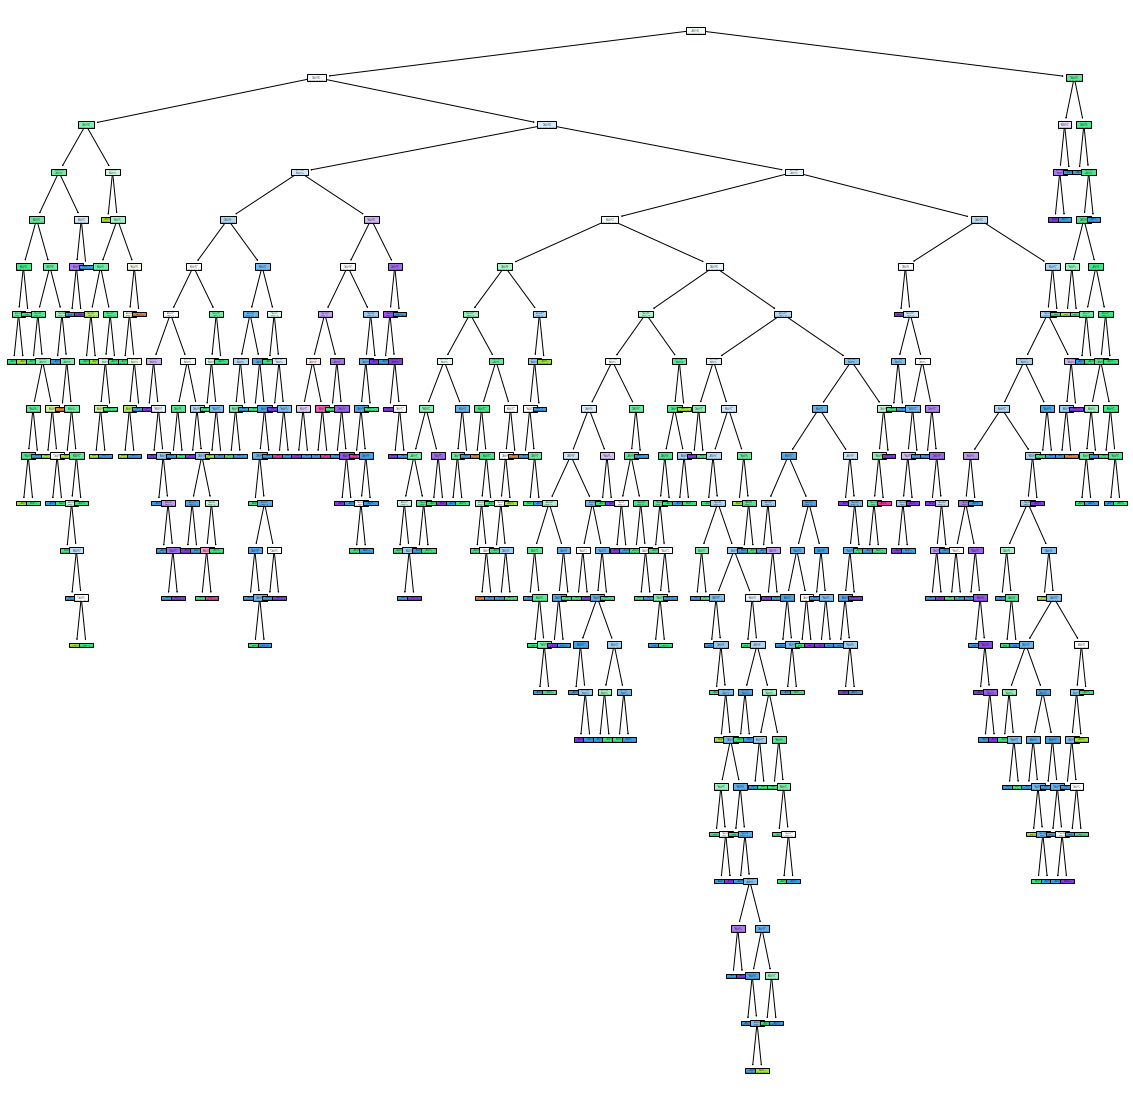

In [39]:
plt.figure(figsize=(20,20))
for i in range(len(rf.estimators_)):
    tree.plot_tree(rf.estimators_[i], filled=True)

In [40]:
grid_pram = {
    "n_estimators" : [5,10,50,100,120,150],
    'criterion' :['gini','entropy'],
    'max_depth' : range(10),
    'min_samples_leaf' : range(10)
}

In [42]:
grid_search_rf = GridSearchCV(param_grid=grid_pram, cv = 10, n_jobs=6, verbose=1,estimator=rf)

In [43]:
grid_search_rf.fit(x_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


C:\Users\deepak.thakur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done 328 tasks      | elapsed:   13.2s
[Parallel(n_jobs=6)]: Done 780 tasks      | elapsed:   35.3s
[Parallel(n_jobs=6)]: Done 1130 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 1634 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 2184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 2834 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 3632 tasks      | elapsed:  4.9min
[Parallel(n_jobs=6)]: Done 4482 tasks      | elapsed:  6.3min
[Parallel(n_jobs=6)]: Done 5524 tasks      | elapsed:  8.0min
[Parallel(n_jobs=6)]: Done 6902 tasks      | elapsed:  9.5mi

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

In [44]:
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [46]:
rf_new = RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_leaf=1,n_estimators=120)

In [48]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=120)

In [50]:
rf.score(x_test,y_test)

0.6275

[Text(544.664499470339, 1063.5652173913045, 'X[10] <= 10.35\ngini = 0.642\nsamples = 747\nvalue = [6, 31, 511, 472, 171, 8]'),
 Text(276.42624470338984, 1016.2956521739131, 'X[5] <= 20.5\ngini = 0.498\nsamples = 403\nvalue = [2, 13, 400, 205, 15, 0]'),
 Text(91.32028601694915, 969.0260869565218, 'X[1] <= 0.365\ngini = 0.531\nsamples = 285\nvalue = [2, 10, 253, 168, 11, 0]'),
 Text(35.30847457627119, 921.7565217391304, 'X[6] <= 70.0\ngini = 0.483\nsamples = 34\nvalue = [0, 1, 14, 42, 5, 0]'),
 Text(30.26440677966102, 874.4869565217392, 'X[10] <= 9.75\ngini = 0.409\nsamples = 31\nvalue = [0, 1, 8, 42, 5, 0]'),
 Text(20.17627118644068, 827.2173913043479, 'X[0] <= 10.45\ngini = 0.447\nsamples = 17\nvalue = [0, 1, 8, 20, 0, 0]'),
 Text(15.13220338983051, 779.9478260869566, 'X[7] <= 0.998\ngini = 0.555\nsamples = 9\nvalue = [0, 1, 8, 7, 0, 0]'),
 Text(10.08813559322034, 732.6782608695653, 'X[5] <= 12.5\ngini = 0.219\nsamples = 5\nvalue = [0, 1, 0, 7, 0, 0]'),
 Text(5.04406779661017, 685.4086

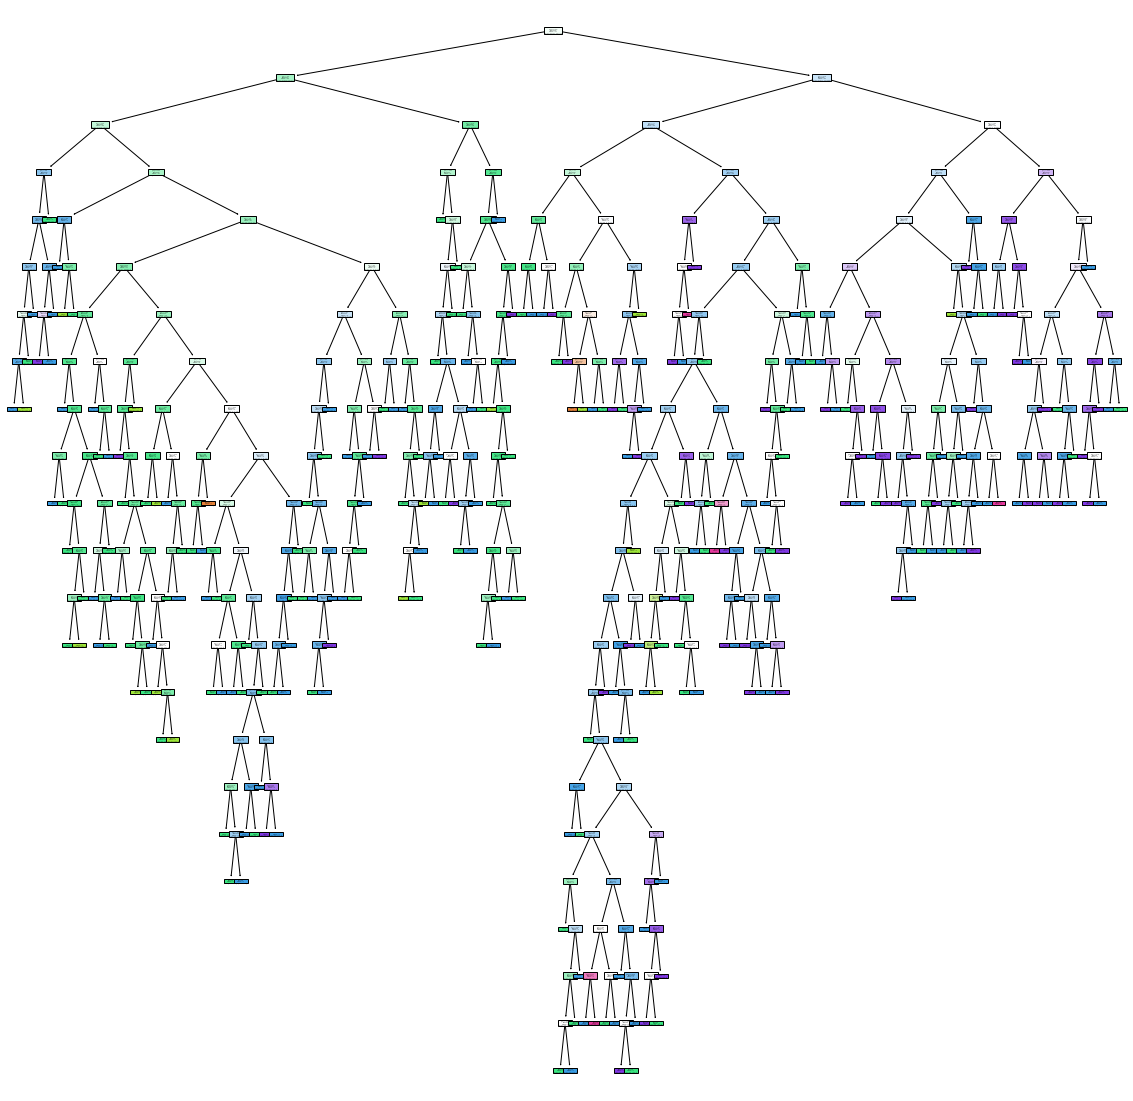

In [51]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0], filled=True)

In [ ]:
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 115}